### Miguel Ángel Villamil Huertas

## Tarea 4 Algoritmos de Aprendizaje no Supervisado 


### K-means e hierarchical clustering

#### Pasos de la actividad 
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de característica.
4. Entrenar el modelo configurando los diferentes 
hiperparámetros
5. Evaluar el desempeño del modelo con métricas como 
Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc
6. Realizar las diferentes gráficas que permitan visualizar los 
resultados del model
7. Interpretar, analizar y documentar los resultados obtenidos.
8. Cargar en GitHub los códigos de los modelos diseñados 
https://github.com/  ..  

### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [6]:
# Carga necesitar la libreria
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

# Para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')


In [7]:
Data = pd.read_csv('./Mall_Customers.csv')

In [8]:
#carga mostrar en Excel 
Data.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [9]:
# Método info esto sirve para hacer la limpieza de los datos 
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# Descripción de los datos
Data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
# Descripción de los datos todos aspectos 
Data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [12]:
#La indexación la sobre Gender
Data['Annual Income (k$)']

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

In [13]:
#Valor utilizar la función
Data['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

#### Visualización de  datos

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

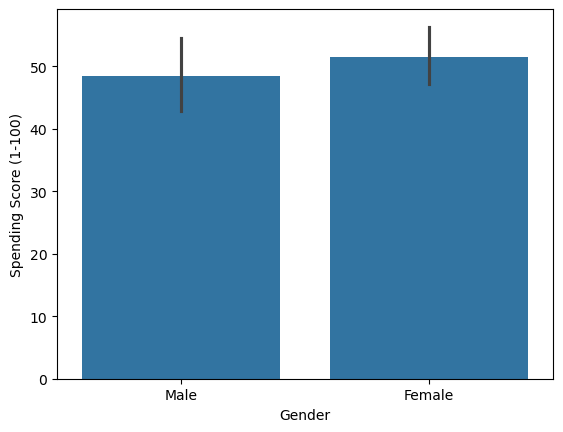

In [15]:
sns.barplot(Data,x='Gender',y='Spending Score (1-100)')

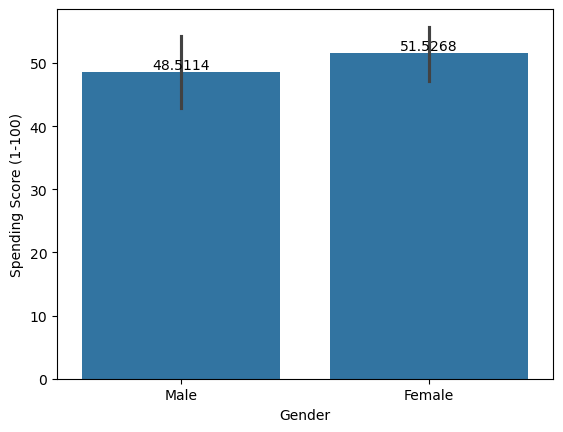

In [16]:
#Colocar los rayos acá está ra
ax = sns.barplot(Data,x='Gender',y='Spending Score (1-100)')
ax.bar_label(ax.containers[0])
plt.show()

In [17]:
#Nuevo organización descendente de variables 
Data.groupby(by='Gender')['Spending Score (1-100)'].mean().reset_index().sort_values(by='Spending Score (1-100)',ascending=False)

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


In [18]:
#Tipo de Elemento variable
Elemento_tipo = Data.groupby(by='Gender')['Spending Score (1-100)'].mean().reset_index().sort_values(by='Spending Score (1-100)',ascending=False)
Elemento_tipo['Spending Score (1-100)'] = Elemento_tipo['Spending Score (1-100)']/1000
COND = Elemento_tipo['Spending Score (1-100)'] > 99.84
#Elemento_tipo = Elemento_tipo[COND]
Elemento_tipo

,Gender,Spending Score (1-100)
0,Female,0.051527
1,Male,0.048511


<Axes: xlabel='Spending Score (1-100)', ylabel='Gender'>

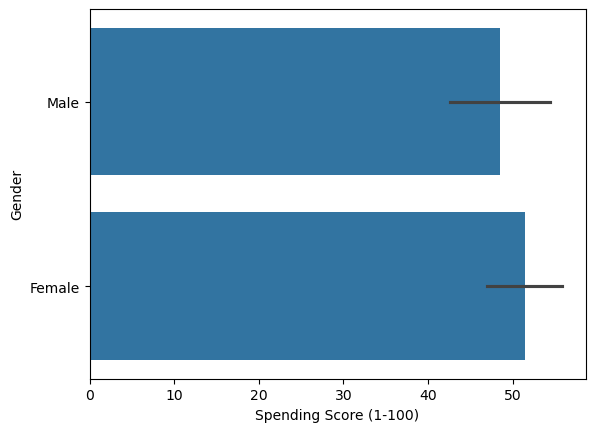

In [19]:
#El valor barra con el color rama
sns.barplot(Data,y='Gender',x='Spending Score (1-100)')

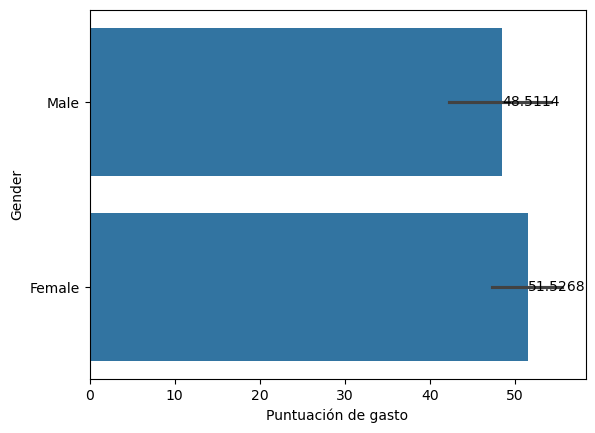

In [20]:
#Iniciar importa sobre un conjunto 
ax = sns.barplot(Data,y='Gender',x='Spending Score (1-100)')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Puntuación de gasto')
plt.show()

### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [22]:
Data = pd.read_csv('./Mall_Customers.csv')

In [23]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Gender: ",Data['Gender'].isin([0]).sum())
print("Cantidad de Registros con cero en Age: ",Data['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Annual : ",Data['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Spending : ",Data['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Gender:  0
Cantidad de Registros con cero en Age:  0
Cantidad de Registros con cero en Annual :  0
Cantidad de Registros con cero en Spending :  0


Text(0.5, 1.0, 'Puntuación de gastos')

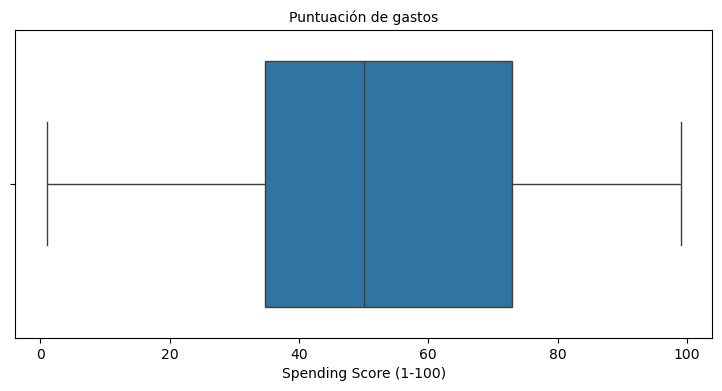

In [24]:
#Identificación de Datos Atípicos

plt.figure(figsize=(9, 4))
sns.boxplot(x=Data['Spending Score (1-100)'])
plt.title('Puntuación de gastos', fontsize=10 )

In [25]:
#Conteo de Datos punto

Data_minimo=0
Data_maximo=100
Total_gastos=((Data['Spending Score (1-100)']<Data_minimo)|(Data['Spending Score (1-100)']>Data_maximo)).sum()
print("Puntuación de gastos es {}".format(Total_gastos))

Puntuación de gastos es 0


In [26]:
# Para saber si una columna tiene valores perdidos
Data['Gender'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: Gender, Length: 200, dtype: bool

In [27]:
#Para conocer cuantos valores perdidos se tienen por columna
Data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [28]:
#Verificar si existen filas duplicadas
Data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [29]:
#Eliminar las filas duplicadas
Data.dropna(thresh=5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [30]:
#El tipo de variables que contiene el objeto Datos 
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de característica.

In [32]:
# Filtrar columnas del modelo 

Data = Data[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

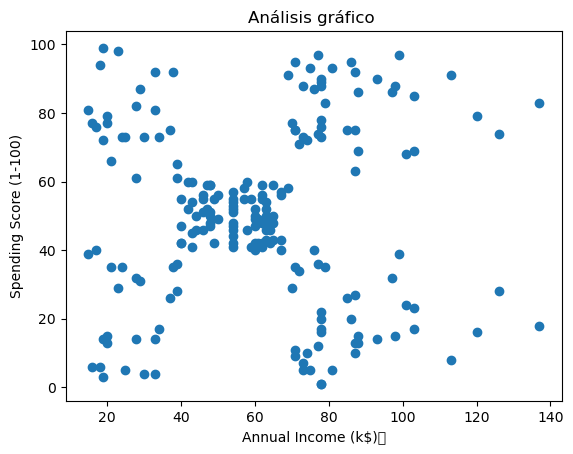

In [33]:
# Grafica antes del agrupamiento

plt.scatter(Data['Annual Income (k$)'], Data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)	')
plt.ylabel('Spending Score (1-100)')
plt.title('Análisis gráfico ')
plt.show()

In [34]:
# Calcular el año actual
current_year = datetime.now().year

# Calcular la edad y agregar como columna 'Age'
Data['Age'] = current_year - Data['Spending Score (1-100)']

# Mostrar las primeras filas para verificar
Data[['Spending Score (1-100)', 'Age']].head()

,Spending Score (1-100),Age
0,39,1985
1,81,1943
2,6,2018
3,77,1947
4,40,1984


### 4. Entrenar el modelo configurando los diferentes hiperparámetros.

In [36]:
Data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,1973.800000,60.560000,50.200000
std,25.823522,26.264721,25.823522
min,1925.000000,15.000000,1.000000
25%,1951.000000,41.500000,34.750000
50%,1974.000000,61.500000,50.000000
75%,1989.250000,78.000000,73.000000
max,2023.000000,137.000000,99.000000


In [37]:
scaler = StandardScaler ()
scaled_data = scaler.fit_transform(Data[['Age', 'Annual Income (k$)']])

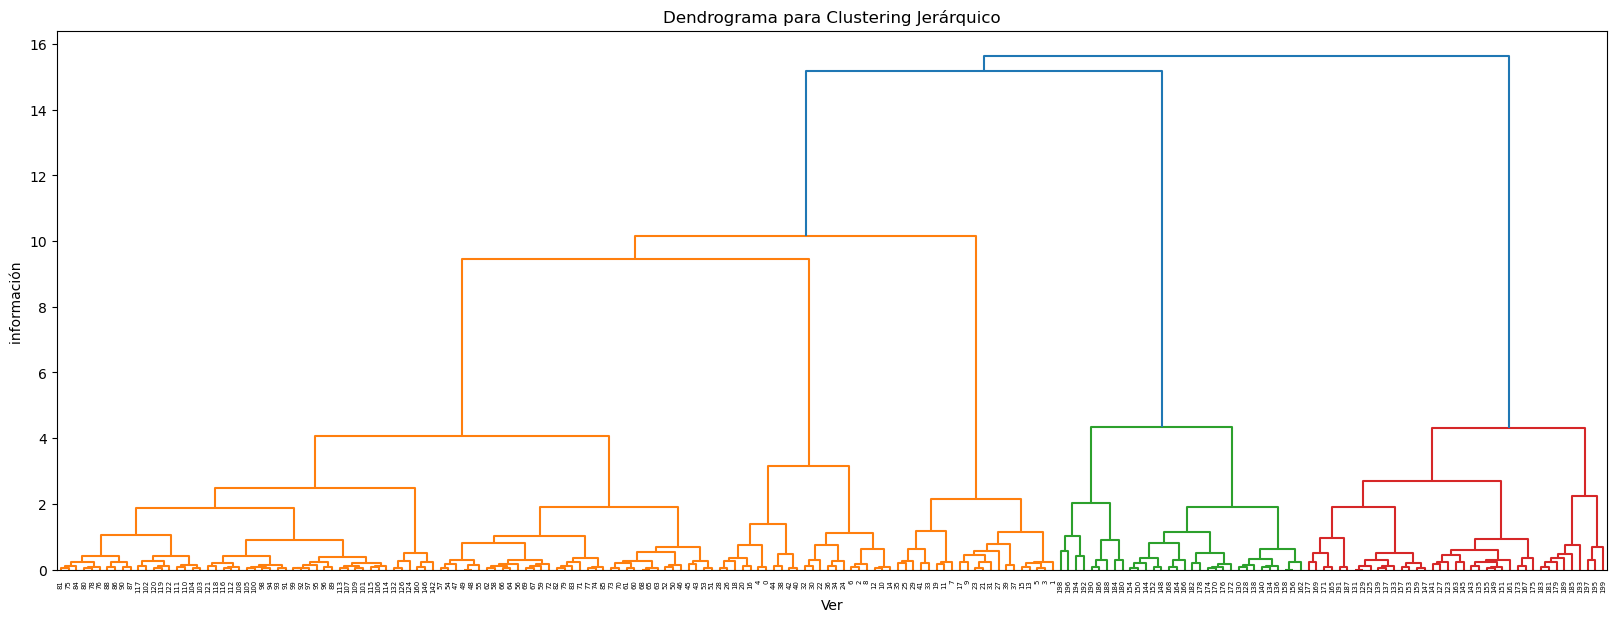

In [38]:
scaled_data = np.nan_to_num(scaled_data)

linked = linkage(scaled_data, method='ward') 

plt.figure(figsize=(20, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Ver')
plt.ylabel('información ')
plt.show()

Interprete; En estadística, la imputación es la sustitución de valores no informados en una observación por otros. A veces es un paso necesario para poder tratar los datos con determinadas técnicas estadísticas de análisis.

Interprete; Datos perdidos, máxima verosimilitud con información completa, imputación múltiple, diseños de datos perdidos, psicometría.

### 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

Interprete Coeficiente; 
- Silhouette
- Índice de Calinski-Harabasz

- Coeficientes de regresión: Representan el cambio promedio en la variable dependiente por cada unidad de cambio en una variable independiente en un modelo de regresión lineal.
- Signo del coeficiente: Indica si la relación es positiva o negativa.
- Magnitud del coeficiente: Indica la fuerza de la relación.
- Coeficientes estandarizados: Se utilizan para comparar la importancia relativa de diferentes variables predictoras en un modelo de regresión.

- Valores más altos: Variables más importantes en la predicción.

In [42]:
Data[['Age', 'Annual Income (k$)']] = Data[['Age', 'Annual Income (k$)']].fillna(Data[['Age', 'Annual Income (k$)']].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Data[['Age', 'Annual Income (k$)']])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.46104814465651617
Índice de Calinski-Harabasz: 143.77956237851726
Índice de Davies-Bouldin: 0.7072871869794293


### 6. Realizar las diferentes gráficas que permitan visualizar los resultados del model.

Este gráfico ilustra la organización de las muestras en función de las características seleccionadas, tales como la edad e ingreso. Los puntos de diferentes colores representan diferentes clusters.

Gráfico de Silueta
Este gráfico ilustra la similitud de cada punto en comparación con otros grupos. Un valor elevado (cercano a 1) indica que los puntos están debidamente agrupados, mientras que un valor bajo (cercano a -1) indica que están debidamente asignados.

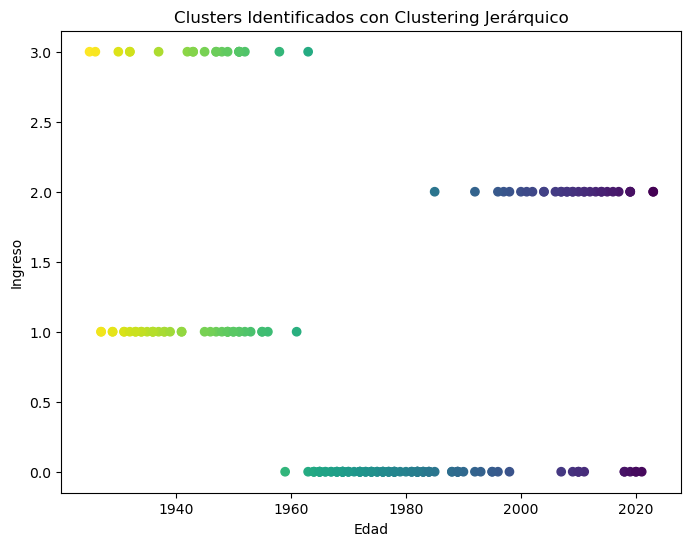

In [45]:
model = AgglomerativeClustering(n_clusters=4)  
Data['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(Data['Age'], Data['Cluster'], c=Data['Spending Score (1-100)'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.show()

Un primer enfoque simple y ampliamente usado, consiste en inicializar los centroides con k
 puntos aleatorios del conjunto de datos. Una de las principales consecuencias derivadas de este tipo de inicialización de centroides es que implica que el proceso de clustering será no determinista. Es decir, diferentes ejecuciones del algoritmo pueden conducir a diferentes modelos y, lógicamente, a diferentes niveles de calidad del resultado.

Esta característica, que en principio podría parecer un inconveniente importante, puede ser superada gracias a la simplicidad y efectividad del método, que permite ejecutar el algoritmo múltiples veces con distintos centroides y escoger el mejor resultado.

Silhouette Score: 0.49255077153406857


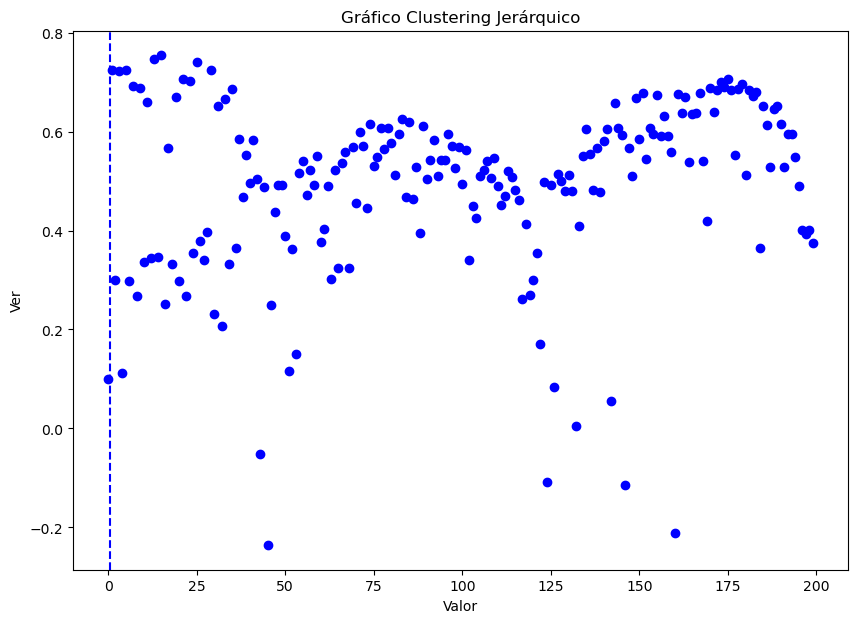

In [47]:
# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="blue", linestyle="--")
ax.set_title("Gráfico Clustering Jerárquico")
ax.set_xlabel("Valor")
ax.set_ylabel("Ver")
plt.show()

### 7. Interpretar, analizar y documentar los resultados obtenidos.

#### •	La edad es un factor demográfico clave que influye significativamente en los patrones de compra y preferencias de los consumidores. Comprender cómo varían estos comportamientos a lo largo de las diferentes etapas de la vida es fundamental para las empresas que buscan adaptar sus estrategias de marketing y desarrollar productos o servicios más atractivos para cada grupo de edad.
#### •	un coeficiente de silueta de 0.46104 sugiere que los clusters no están tan bien definidos como se desearía. Sin embargo, este valor no es necesariamente un indicador de un mal agrupamiento, sino más bien una señal de que es necesario ajustar el modelo o explorar otras opciones.
#### •	un índice de Calinski-Harabasz de 143.7 sugiere que el modelo de clustering ha realizado un buen trabajo al identificar grupos naturales en los datos. Sin embargo, es importante considerar otros factores y realizar un análisis más profundo para tomar decisiones informadas.
#### •	un índice de Davies-Bouldin de 0.707287 indica un agrupamiento razonable, pero existen oportunidades para mejorar los resultados.


### 8. Cargar en GitHub los códigos de los modelos diseñados https://github.com/ ..

https://github.com/MiguellV001/Fase-4---K-means-e-hierarchical-clustering.git